![alt text](https://upload.wikimedia.org/wikipedia/commons/1/1a/NumPy_logo.svg "NumPy Logo")

This notebook is for the Emerging Technologies module in GMIT. This notebook should cover the use of the python package numpy. The numpy documentation and a majority of the references for this notebook can be found [here](https://docs.scipy.org/doc/numpy/reference/index.html). The GitHub repository can be found [here](https://github.com/lanodburke/Emerging-Technologies-Project).

This notebook should specifically cover the use of the NumPy random package. The documentation can be found [here](https://docs.scipy.org/doc/numpy-1.15.1/reference/routines.random.html). 

## Using NumPy

In [9]:
# To use NumPy you have to install it either using pythons package installer 
# pip or if you are using anaconda you can use the conda install tool

# pip install numpy
# conda install numpy

# To use the package import it as follows:

import numpy as np

## NumPy random
The NumPy random package is a large subset of the NumPy package and is mainly used for random number generation in scientific computing.

### NumPy randon.random_sample
#### numpy.random.random_sample(size=None)

Return random floats in the half-open interval [0.0, 1.0).

Results are from the “continuous uniform” distribution over the stated interval. 

#### Parameters: 
- #### size: int or tuple of ints, optional 
    - Output shape. If the given shape is, e.g., (m, n, k), then m * n * k samples are drawn. Default is None, in which case a single value is returned.
    
#### Returns: 
- #### float or ndarray of floats
    - Array of random floats of shape size (unless size=None, in which case a single float is returned).

In [10]:
np.random.random_sample() 

0.5520225921769331

In [11]:
# option None returns single float value
type(np.random.random_sample())

float

In [12]:
# ndarry of random numbers
np.random.random_sample((5,))

array([ 0.00998375,  0.21007701,  0.56524476,  0.51791274,  0.80324316])

In [13]:
# Three-by-two array of random numbers from [-5, 0):
5 * np.random.random_sample((3, 2)) - 5

array([[-2.3641208 , -1.53613284],
       [-1.49257887, -4.31489387],
       [-0.00995082, -1.28850156]])

### NumPy random.choice
#### numpy.random.choice(a, size=None, replace=True, p=None)
Generates a random sample from a given 1-D array

#### Parameters: 
- #### a : 1-D array-like or int
    - If an ndarray, a random sample is generated from its elements. If an int, the random sample is generated as if a were np.arange(a)

- #### size : int or tuple of ints, optional
    - Output shape. If the given shape is, e.g., (m, n, k), then m * n * k samples are drawn. Default is None, in which case a single value is returned.

- #### replace : boolean, optional
    - Whether the sample is with or without replacement

- #### p : 1-D array-like, optional
    - The probabilities associated with each entry in a. If not given the sample assumes a uniform distribution over all entries in a.
    
#### Returns: 
- #### samples : single item or ndarray
    - The generated random samples

In [14]:
# Generate a uniform random sample from np.arange(5) of size 3:
np.random.choice(5, 3)

array([2, 2, 2])

In [15]:
# Generate a non-uniform random sample from np.arange(5) of size 3:
np.random.choice(5, 3, p=[0.1, 0, 0.3, 0.6, 0])

array([2, 2, 0])

In [16]:
# Generate a uniform random sample from np.arange(5) of size 3 without replacement:
np.random.choice(5, 3, replace=False)

array([2, 0, 3])

In [17]:
# Generate a non-uniform random sample from np.arange(5) of size 3 without replacement:
np.random.choice(5, 3, replace=False, p=[0.1, 0, 0.3, 0.6, 0])

array([3, 2, 0])

In [18]:
# Any of the above can be repeated with an arbitrary array-like instead of just integers. For instance:
aa_milne_arr = ['pooh', 'rabbit', 'piglet', 'Christopher']
np.random.choice(aa_milne_arr, 5, p=[0.5, 0.1, 0.1, 0.3])

array(['pooh', 'piglet', 'rabbit', 'pooh', 'Christopher'],
      dtype='<U11')

## Probability Distributions
> A probability distribution is a function that describes the likelihood of obtaining the possible values that a random variable can assume. In other words, the values of the variable vary based on the underlying probability distribution.

NumPy provides a number of statistical probability distributions to use for random sampling. The most commonly used are: 
- Normal
- Uniform
- Binomial
- Poisson

To help us understand these distributions I am going to use matplotlib.pyplot package to plot each distribution.

In [19]:
# To use matplotlib.pyplot import it as follows
import matplotlib.pyplot as plt

### Normal Distribution
> When you understand the properties of the normal distribution, you’ll find it easier to interpret statistical data. A continuous random variable X has a normal distribution if its values fall into a smooth (continuous) curve with a bell-shaped pattern.

Every normal distribution has certain properties. You use these properties to determine the relative standing of any particular result on the distribution, and to find probabilities. The properties of any normal distribution are as follows:

- Its shape is symmetric (that is, when you cut it in half the two pieces are mirror images of each other).

- Its distribution has a bump in the middle, with tails going down and out to the left and right.

- The mean and the median are the same and lie directly in the middle of the distribution (due to symmetry).

- Its standard deviation measures the distance on the distribution from the mean to the inflection point (the place where the curve changes from an “upside-down-bowl” shape to a “right-side-up-bowl” shape).

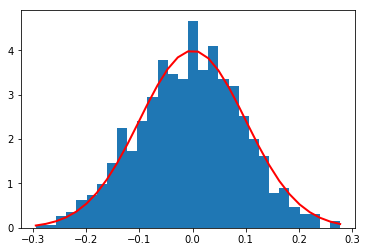

In [20]:
# Draw samples from distribution
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)

#Display the histogram of the samples, along with the probability density function:
count, bins, ignored = plt.hist(s, 30, density=True)

plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2, color='r')

### Uniform Distribution
> A uniform distribution, sometimes also known as a rectangular distribution, is a distribution that has constant probability.

The uniform distribution is a continuous distribution that assigns only positive probabilities within a specified interval (a, b) — that is, all values between a and b. (a and b are two constants; they may be negative or positive.)

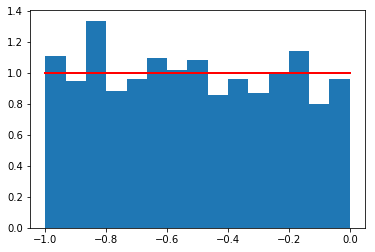

In [21]:
# Draw samples from the distribution:
s = np.random.uniform(-1,0,1000)

# Display the histogram of the samples, along with the probability density function:
count, bins, ignored = plt.hist(s, 15, density=True)
plt.plot(bins, np.ones_like(bins), linewidth=2, color='r')
plt.show()

### Binomial Distribution
> Binomial distribution, in mathematics and statistics, is the probability of a particular outcome in a series when the outcome has two distinct possibilities, success or failure. The prefix bi means two.

One way to illustrate the binomial distribution is with a histogram. A histogram shows the possible values of a probability distribution as a series of vertical bars. The height of each bar reflects the probability of each value occurring. A histogram is a useful tool for visually analyzing the properties of a distribution, and (by the way) all discrete distributions may be represented with a histogram.

(array([  3.,   3.,  14.,  18.,   0.,  18.,  28.,   8.,   7.,   1.]),
 array([ 1. ,  1.8,  2.6,  3.4,  4.2,  5. ,  5.8,  6.6,  7.4,  8.2,  9. ]),
 <a list of 10 Patch objects>)

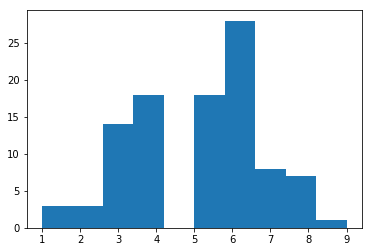

In [22]:
# Draw samples from the distribution:
n, p = 10, .5  # number of trials, probability of each trial
s = np.random.binomial(n, p, 100)
# result of flipping a coin 10 times, tested 1000 times.

# plot distribution
plt.hist(s)

### Poisson Distribution
> The Poisson distribution is the discrete probability distribution of the number of events occurring in a given time period, given the average number of times the event occurs over that time period.

A certain fast-food restaurant gets an average of 3 visitors to the drive-through per minute. This is just an average, however. The actual amount can vary.

A Poisson distribution can be used to analyze the probability of various events regarding how many customers go through the drive-through. It can allow one to calculate the probability of a lull in activity (when there are 0 customers coming to the drive-through) as well the probability of a flurry of activity (when there are 5 or more customers coming to the drive-through). This information can, in turn, help a manager plan for these events with staffing and scheduling.

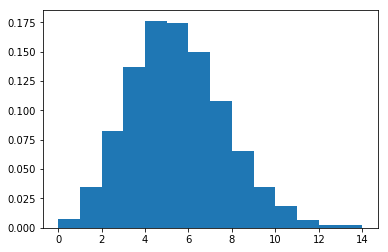

In [23]:
s = np.random.poisson(5, 10000)
count, bins, ignored = plt.hist(s, 14, density=True)
plt.show()

### Refrences 
- [Statistical Distributions](http://blog.cloudera.com/blog/2015/12/common-probability-distributions-the-data-scientists-crib-sheet/)
- [Normal Distribution](https://www.dummies.com/education/math/statistics/understanding-the-statistical-properties-of-the-normal-distribution/)